# Ammar Ahmed - 23033712
## Final Visualisation Report

## Import Important Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

## Reading Data

In [2]:
# Data Preparation and read the csv file into a DataFrame
df = pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Statistical Analysis

In [4]:
# Table - Summary Statistics (New Table)
summary_table = df.describe()

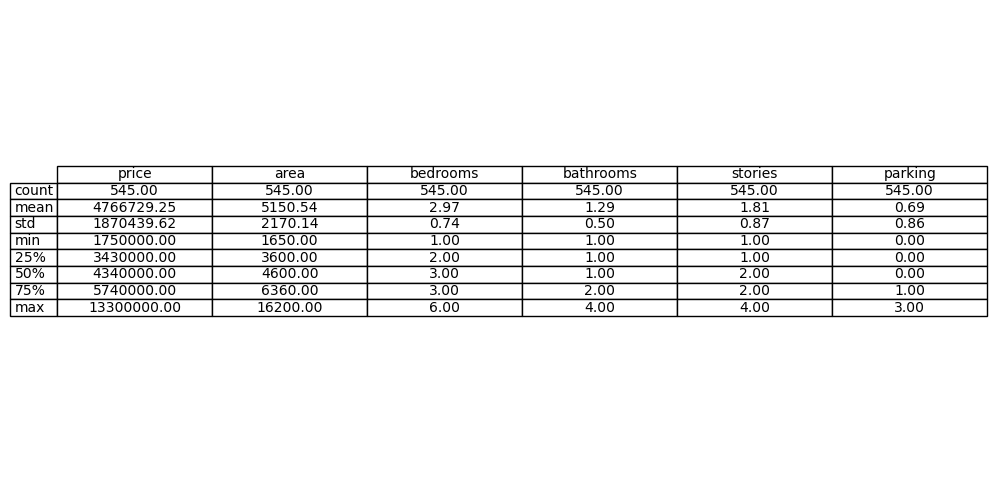

In [5]:
def save_summary_table_image(df):
    """
    Generates an image of the summary statistics table and saves it as a PNG file.
    
    """
    # Generate the summary statistics table
    summary = df.describe()
    summary = summary.applymap(lambda x: f'{x:.2f}')

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create the table
    table = ax.table(cellText=summary.values,
                     colLabels=summary.columns,
                     rowLabels=summary.index,
                     loc='center',
                     cellLoc='center',
                     colWidths=[0.2]*len(summary.columns))

    # Remove axes
    ax.axis('off')

    # Save the table as an image
    plt.savefig('summary_statistics_table.png', bbox_inches='tight', pad_inches=0.1)

    # Show the table
    plt.show()

# Call the function with your DataFrame to generate and save the summary statistics table image
save_summary_table_image(df)


## Data Analysis through Data Visualization

In [6]:
# Plot 1 - Pie Chart
def plot_pie_chart(df):
    """
    Creates a pie chart for multi-storey houses
    """
    category = df.iloc[:, 4].unique()
    category_count = df.iloc[:, 4].value_counts()
    labels = [str(cat) + ' story' for cat in category]
    sizes = [category_count[cat] for cat in category]
    
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title('Distribution of Houses Storey-wise')
    plt.savefig('pie_chart.png', dpi=300)
    plt.show()

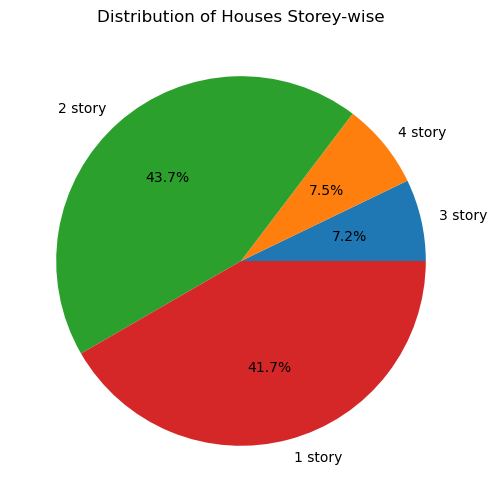

In [7]:
plot_pie_chart(df)

In [8]:
# Plot 2 - Histogram
def price_distribution_plot(df):
    """
    create a Histogram for finding frequency of houses prices
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(df['price'], bins=30, kde=True, color='purple', edgecolor='black')
    plt.title('Distribution of House Prices', fontsize=16)
    plt.xlabel('Price', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.savefig('PriceDistributionPlot.png', dpi=300)
    plt.show()

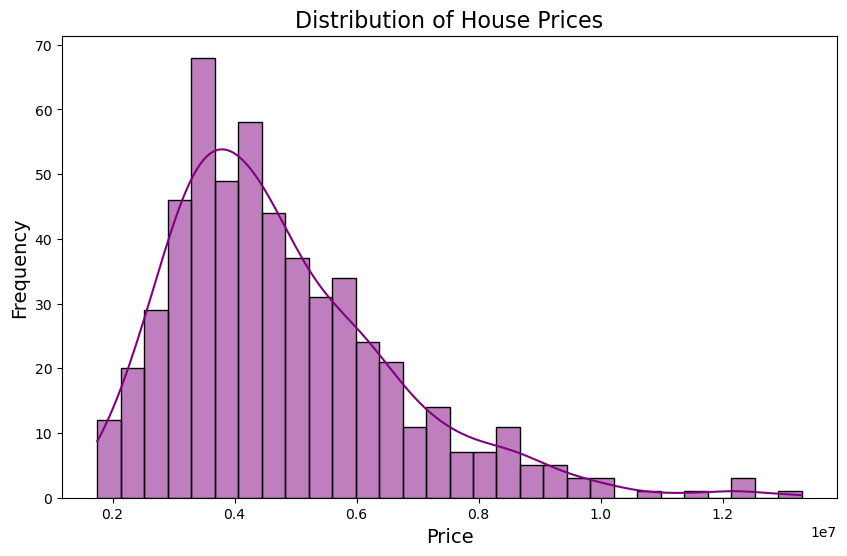

In [9]:
price_distribution_plot(df)

In [10]:
# Plot 3 - Scatter Plot
def plot_scatterplot(df):
    """
    Create a scatter plot for prices of house against area in square feet
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='area', y='price', data=df, hue='bedrooms', size='bathrooms', palette='viridis', sizes=(20, 200))
    plt.title('Scatter Plot of House Prices vs. Area')
    plt.xlabel('Area (sq. feet)', fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.legend(title='Bedrooms')
    plt.savefig('ScatterPlot.png', dpi=300)
    plt.show()

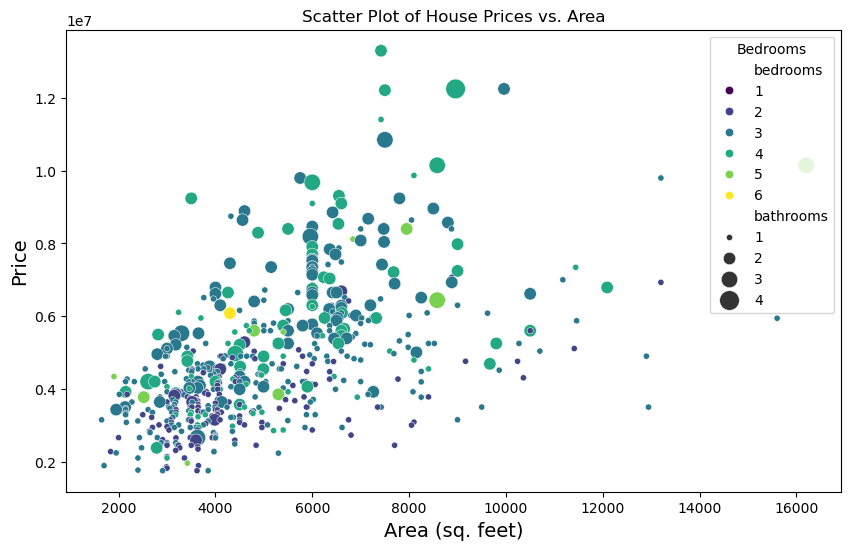

In [11]:
plot_scatterplot(df)

In [12]:
# Plot 4 - Box Plot
def plot_boxplot(df):
    """
    Create a box plot for estimation of prices versus number of bedrooms
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='bedrooms', y='price', data=df, palette='Set2',hue = 'bedrooms' ,legend = False)
    plt.xlabel('Number of Bedrooms', fontsize=14)
    plt.ylabel('House Price', fontsize=14)
    plt.title('Number of Bedrooms vs House Price')
    plt.savefig('BoxPlot.png', dpi=300)
    plt.show()

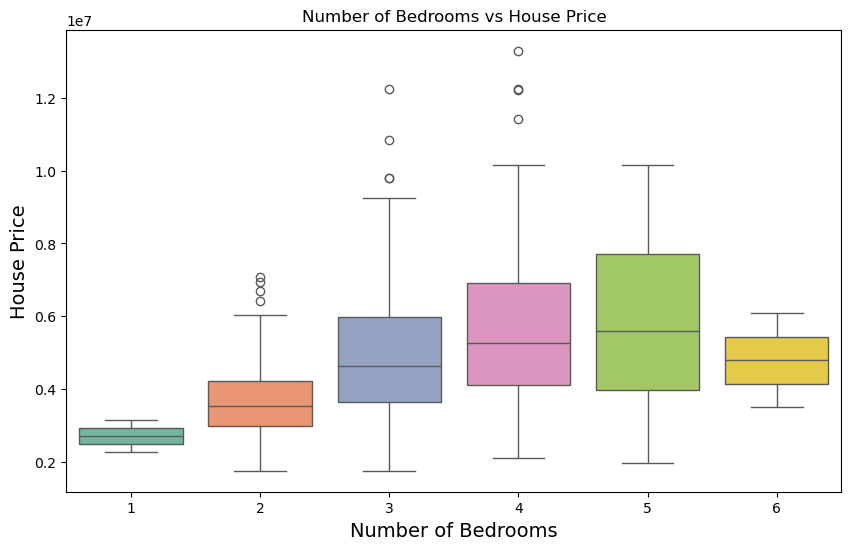

In [13]:
plot_boxplot(df)

In [14]:
# Plot 5 - Heatmap
def plot_heatmap(df):
    """
    Create a heat map correlation matrix 
    """
    plt.figure(figsize=(10, 6))
    

    # Create correlation matrix
    correlation_matrix = df.corr(numeric_only=True)

    # Create a mask to display only the lower triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Plot heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", mask = mask,linewidths=.5, vmin=0, vmax=1)
    # Add title
    plt.title('Correlation Heatmap')

    # Save plot as a PNG image
    plt.savefig('heatmap.png', dpi=600)

    # Display the plot
    plt.show()
    return 


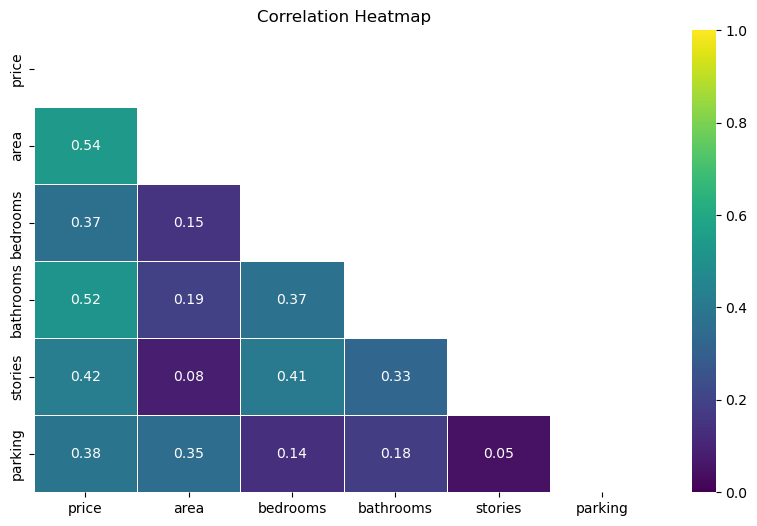

In [15]:
plot_heatmap(df)

In [16]:
# Plot 6 - Count PLot
def plot_count_plot(df):
    """
    Create count plots for binary variables
    """
    binary_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
    plt.figure(figsize=(12, 8))
    for i, var in enumerate(binary_vars, 1):
        plt.subplot(2, 3, i)
        sns.countplot(x=var, data=df)
        plt.title(f'Count Plot of {var.capitalize()}')
        plt.xlabel(var.capitalize())
        plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig('CountPlots.png', dpi=900)
    plt.show()


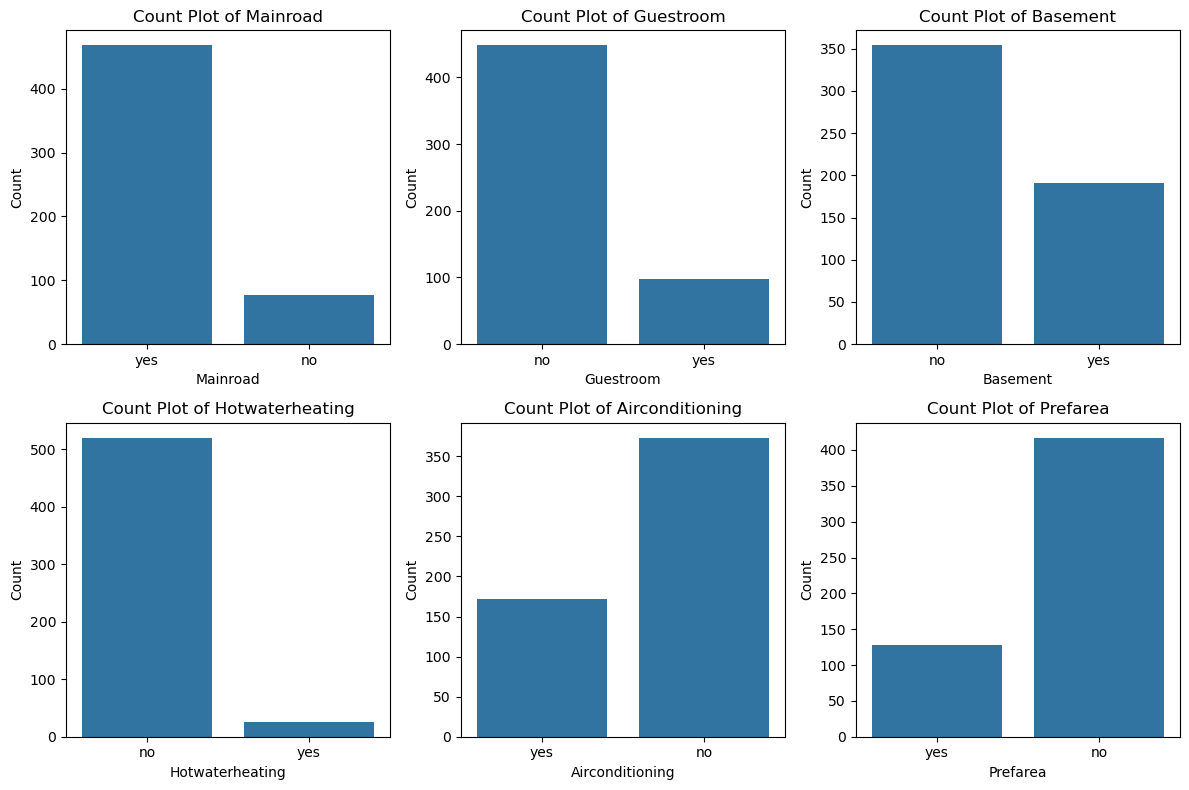

In [17]:
plot_count_plot(df)

In [18]:
# Plot 7 - Violin Plot
def plot_violin_plot(df):
    """
    Create a violin plot for furnishing status
    """
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Colors for the three categories
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='furnishingstatus', y='price', data=df, palette=colors)
    plt.title('Violin Plot of Furnishing Status vs. Price')
    plt.xlabel('Furnishing Status')
    plt.ylabel('Price')
    plt.savefig('ViolinPlot.png', dpi=300)
    plt.show()

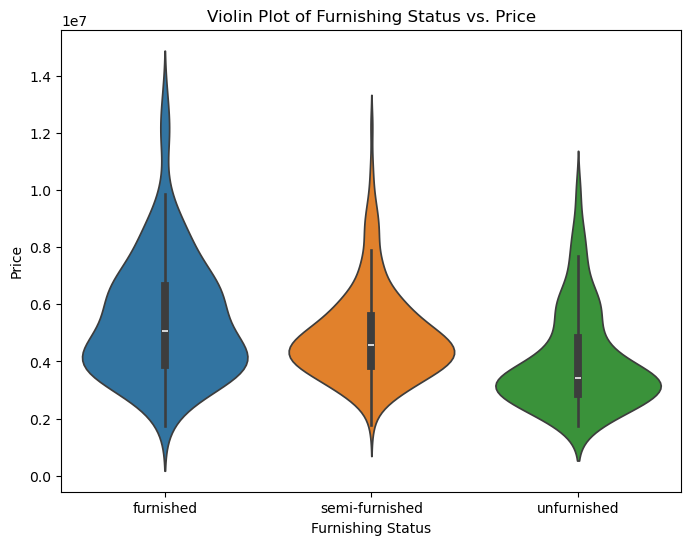

In [19]:
plot_violin_plot(df)